# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 


### Question(s) for Analysis
>Do we have useless columns that needs to be removed?.

>Do we have duplicated data? missing or null values?.

>Does the popularity affected by votings?.

>Does the release year affect the revenues?.

>Which geners has the most revenue?.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> In this section, and after setting the questions, the unused columns will be dropped , so it can be more consistent and clear, also it will be free of duplicated and missing values.

# General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df_movie = pd.read_csv('tmdb-movies.csv')
df_movie.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data
df_movie.drop(['id', 'homepage', 'tagline', 'overview','budget_adj', 'revenue_adj', 'keywords', 'vote_count', 'cast', 'imdb_id'], axis=1 , inplace=True)

In [4]:
df_movie

popularity     budget     revenue                original_title  \
0       32.985763  150000000  1513528810                Jurassic World   
1       28.419936  150000000   378436354            Mad Max: Fury Road   
2       13.112507  110000000   295238201                     Insurgent   
3       11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4        9.335014  190000000  1506249360                     Furious 7   
...           ...        ...         ...                           ...   
10861    0.080598          0           0            The Endless Summer   
10862    0.065543          0           0                    Grand Prix   
10863    0.065141          0           0           Beregis Avtomobilya   
10864    0.064317          0           0        What's Up, Tiger Lily?   
10865    0.035919      19000           0      Manos: The Hands of Fate   

                 director  runtime                                     genres  \
0         Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1           George Miller      120  Action|Adventure|Science Fiction|Thriller   
2        Robert Schwentke      119         Adventure|Science Fiction|Thriller   
3             J.J. Abrams      136   Action|Adventure|Science Fiction|Fantasy   
4               James Wan      137                      Action|Crime|Thriller   
...                   ...      ...                                        ...   
10861         Bruce Brown       95                                Documentary   
10862  John Frankenheimer      176                     Action|Adventure|Drama   
10863      Eldar Ryazanov       94                             Mystery|Comedy   
10864         Woody Allen       80                              Action|Comedy   
10865    Harold P. Warren       74                                     Horror   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1      Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2      Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3              Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4      Universal Pictures|Original Film|Media Rights ...       4/1/15   
...                                                  ...          ...   
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

       vote_average  release_year  
0               6.5          2015  
1               7.1          2015  
2               6.3          2015  
3               7.5          2015  
4               7.3          2015  
...             ...           ...  
10861           7.4          1966  
10862           5.7          1966  
10863           6.5          1966  
10864           5.4          1966  
10865           1.5          1966  

[10866 rows x 11 columns]

In [5]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data
#counting the duplicated rows in the dataset
sum(df_movie.duplicated())

1

In [6]:
#removing the duplicated data
df_movie.drop_duplicates(inplace=True)
df_movie

popularity     budget     revenue                original_title  \
0       32.985763  150000000  1513528810                Jurassic World   
1       28.419936  150000000   378436354            Mad Max: Fury Road   
2       13.112507  110000000   295238201                     Insurgent   
3       11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4        9.335014  190000000  1506249360                     Furious 7   
...           ...        ...         ...                           ...   
10861    0.080598          0           0            The Endless Summer   
10862    0.065543          0           0                    Grand Prix   
10863    0.065141          0           0           Beregis Avtomobilya   
10864    0.064317          0           0        What's Up, Tiger Lily?   
10865    0.035919      19000           0      Manos: The Hands of Fate   

                 director  runtime                                     genres  \
0         Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1           George Miller      120  Action|Adventure|Science Fiction|Thriller   
2        Robert Schwentke      119         Adventure|Science Fiction|Thriller   
3             J.J. Abrams      136   Action|Adventure|Science Fiction|Fantasy   
4               James Wan      137                      Action|Crime|Thriller   
...                   ...      ...                                        ...   
10861         Bruce Brown       95                                Documentary   
10862  John Frankenheimer      176                     Action|Adventure|Drama   
10863      Eldar Ryazanov       94                             Mystery|Comedy   
10864         Woody Allen       80                              Action|Comedy   
10865    Harold P. Warren       74                                     Horror   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1      Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2      Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3              Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4      Universal Pictures|Original Film|Media Rights ...       4/1/15   
...                                                  ...          ...   
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

       vote_average  release_year  
0               6.5          2015  
1               7.1          2015  
2               6.3          2015  
3               7.5          2015  
4               7.3          2015  
...             ...           ...  
10861           7.4          1966  
10862           5.7          1966  
10863           6.5          1966  
10864           5.4          1966  
10865           1.5          1966  

[10865 rows x 11 columns]

In [7]:
df_movie.nunique()
#investigating the columns with unique values

popularity              10814
budget                    557
revenue                  4702
original_title          10571
director                 5067
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_average               72
release_year               56
dtype: int64

Because our dataset is about movie, so each movie has their features, and I see that it's the reason we have a large unqiue vales.

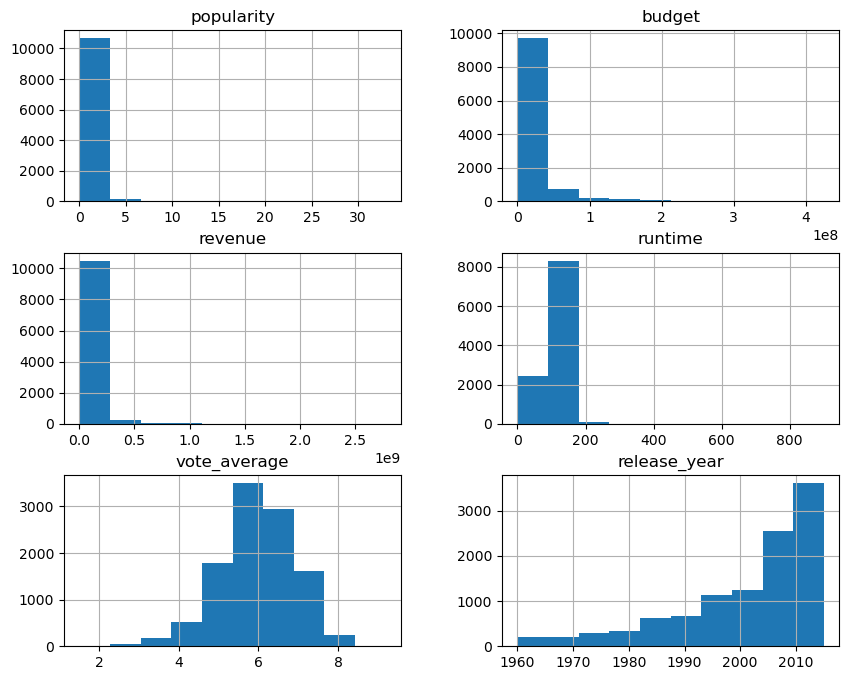

In [8]:
df_movie.hist(figsize=(10,8));

In [9]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data
#investigating datatypes, null, columns, and features 
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   release_date          10865 non-null  object 
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1018.6+ KB


In [10]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data
#investigating if there are any missing values
df_movie.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

In [11]:
#removing null values
df_movie.dropna(inplace=True)
df_movie.isnull().sum().any() #ensuring that the null values are deleted
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float64
 1   budget                9806 non-null   int64  
 2   revenue               9806 non-null   int64  
 3   original_title        9806 non-null   object 
 4   director              9806 non-null   object 
 5   runtime               9806 non-null   int64  
 6   genres                9806 non-null   object 
 7   production_companies  9806 non-null   object 
 8   release_date          9806 non-null   object 
 9   vote_average          9806 non-null   float64
 10  release_year          9806 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 919.3+ KB


# Research Question : Does popularity affected by ratings?

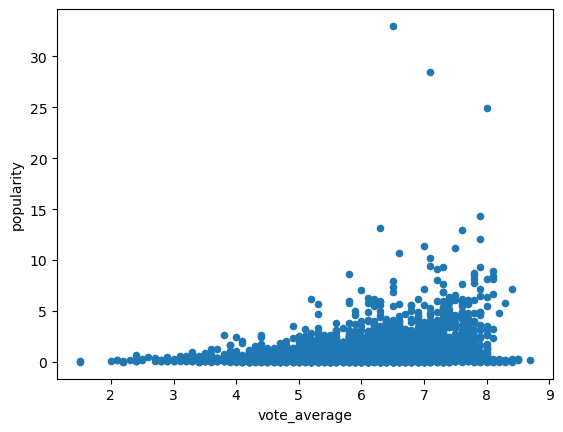

In [12]:
df_movie.plot(x='vote_average', y='popularity', kind='scatter');

Looks like the greater the vote_average, the greater the popularity too!, there is a relationship between the average of votings and popularity.

# Research Question : Does the release year affect the revenues?

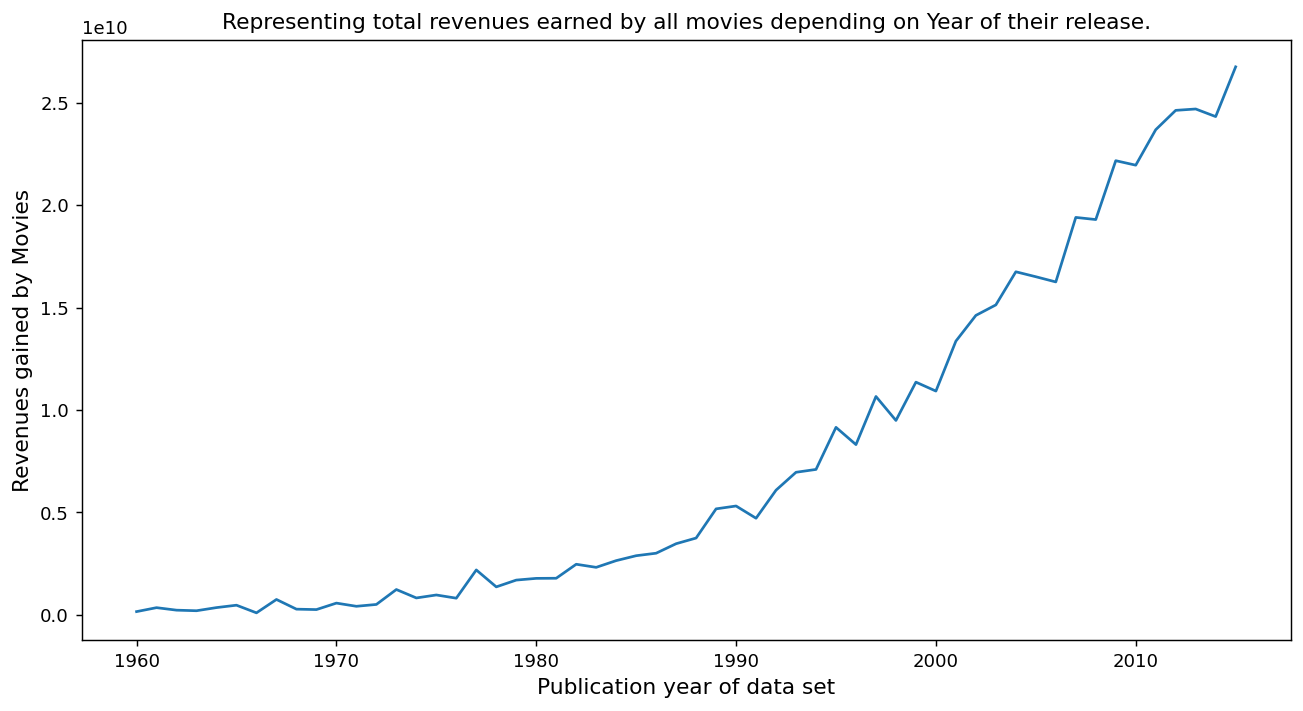

In [13]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df_movie.groupby('release_year')['revenue'].sum()
#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Publication year of data set', fontsize = 12)
#on y-axis
plt.ylabel('Revenues gained by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing total revenues earned by all movies depending on Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()


Looks like years from 2010 to above has the most average of revenues!

# Research Question: Which geners has the most revenue?

In [17]:
#selecting the movies having profit $40M or more
profit = df_movie[df_movie['revenue'] >= 40000000]

#reindexing new data
profit.index = range(len(profit))

#we will start from 1 instead of 0
profit.index = profit.index + 1

#printing the changed dataset
profit.head()

popularity     budget     revenue                original_title  \
1   32.985763  150000000  1513528810                Jurassic World   
2   28.419936  150000000   378436354            Mad Max: Fury Road   
3   13.112507  110000000   295238201                     Insurgent   
4   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
5    9.335014  190000000  1506249360                     Furious 7   

           director  runtime                                     genres  \
1   Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
2     George Miller      120  Action|Adventure|Science Fiction|Thriller   
3  Robert Schwentke      119         Adventure|Science Fiction|Thriller   
4       J.J. Abrams      136   Action|Adventure|Science Fiction|Fantasy   
5         James Wan      137                      Action|Crime|Thriller   

                                production_companies release_date  \
1  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
2  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
3  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
4          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
5  Universal Pictures|Original Film|Media Rights ...       4/1/15   

   vote_average  release_year  
1           6.5          2015  
2           7.1          2015  
3           6.3          2015  
4           7.5          2015  
5           7.3          2015

In [16]:
#investigating the new dataframe
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 1 to 2165
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            2165 non-null   float64
 1   budget                2165 non-null   int64  
 2   revenue               2165 non-null   int64  
 3   original_title        2165 non-null   object 
 4   director              2165 non-null   object 
 5   runtime               2165 non-null   int64  
 6   genres                2165 non-null   object 
 7   production_companies  2165 non-null   object 
 8   release_date          2165 non-null   object 
 9   vote_average          2165 non-null   float64
 10  release_year          2165 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 186.2+ KB


This new dataframe has 2165 features and 11 columns , the old one has 10865 features and the same 11 columns!

# Research Question: which genres has the highest revenue?

In [18]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [21]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Drama        848
Comedy       812
Action       721
Thriller     659
Adventure    548
dtype: int64

I will make it visual so it can be more clear!

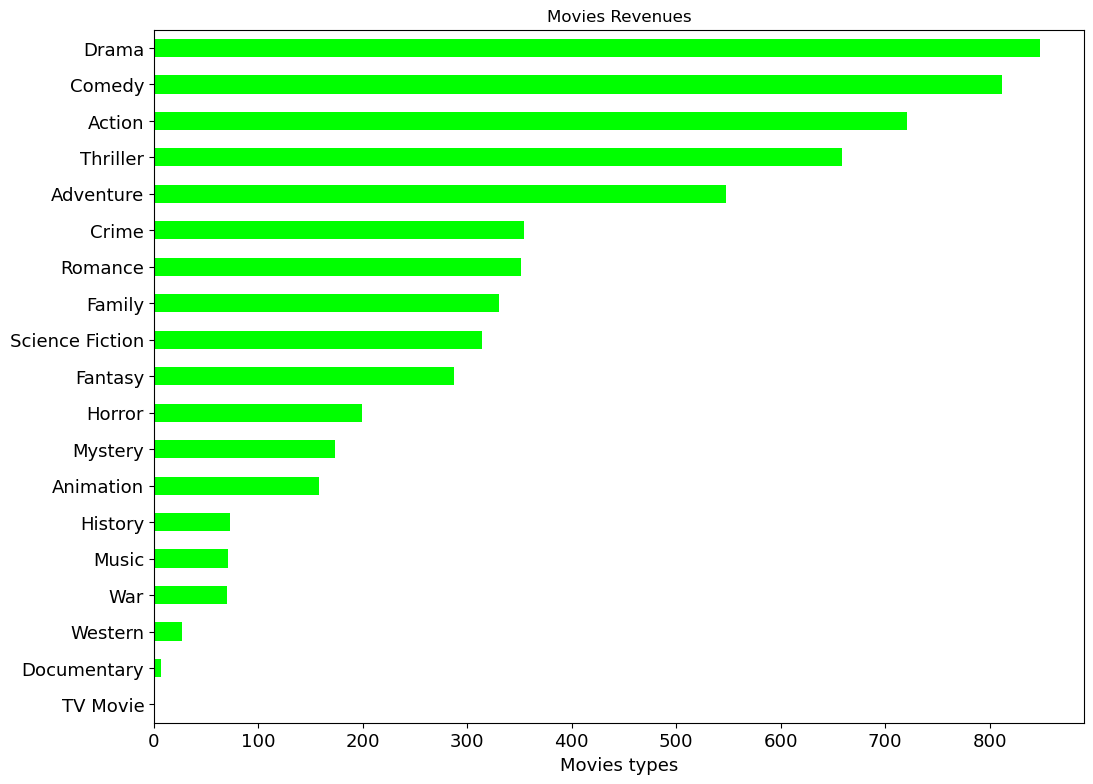

In [23]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Movies Revenues')

# on x axis
lt.set_xlabel('Movies types', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

It seems that the comedy movies has the best revenues!! , I think directors should pay attention more to these types of movies!

#<a id='conclusions'></a>
## Conclusions

> Finally, after investigating the dataset, and exploring it successflly using visuals to answer the research question, It seems to be clear that votings reflect the popularity of the movies which affect the revenues of that movie directly! also it was so helpful to explore which genres has the most revenues! so it can help the directors to choose the genres of their movies carefully!.

>Limitations: This analysis was done considering the movies which had a significant amount of revenues . This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completely corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])